# Using the Virgo Filament Catalogs #

The goals of this notebook: is to sho
* what is in the Virgo Filament tables
* how to read in the tables
* how to combine data from multiple tables
* how to make your own table that contains your favorite variables

# 1. Overview of Tables #
## Main Catalog ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_main.fits| The main catalog.  Gives flags to indicate if galaxy is in other catalogs.|

## Parent Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_hyperleda.fits|Hyperleda catalog |
|vf_north_v0_nsa.fits| NSA version 1 |
|vf_north_v0_nsa_v0.fits| NSA version 0|
|vf_north_v0_a100.fits| A100 cross match |


## Our Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_co.fits | CO catalog*|
|vf_north_v0_ha.fits| Halpha catalog* |

## Ancillary Catalogs ##
|Table | Brief Description |
|------|-------------------|
|vf_north_v0_steer17.fits| Steer+17 distance catalog|
|vf_north_v0_z0mgs.fits| z=0 Multiwavelength Galaxy Survey (Leroy+2019) |
|vf_north_v0_main_unwise.fits|unWISE catalog match |
|vf_north_v0_main_env_prop_H0_74_0.fits| Gianluca's environment catalog |
|vf_north_v0_a100_sdssphot.fits| sdss phot matched to A100 (Durbala+2020) |
|vf_north_v0_a100_unwise.fits| unwise matches to A100 sample (Durbala+2020) |
|vf_north_v0_groups.fits| output from John Moustakas's group-finding code.  For legacy images only.|

In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os

# 2: Reading and working with the tables #

* The tables are stored on google drive in the folder vf-tables:
  * https://drive.google.com/drive/folders/1UOQhd1maJeGxoWpivnhTNISwLDEMe0FY?usp=sharing
  * You should all have access to the drive folder
* We are using the North only version.
  * Select V0.
  * Then select the folder with the most recent date.
* Save the tables to your local computer.
  * change tabledir below to reflect the location of your tables
* change the plotdir to the directory where you want the plots saved

In [2]:
tabledir = '/home/rfinn/research/Virgo/tables-north/v0/'
plotdir = '/home/rfinn/research/Virgo/plots/'

## List the available tables ##

In [3]:
os.listdir(tabledir)

['vf_north_v0_main_4000_4499.fits',
 'vf_north_v0_main_filament_membership.fits',
 'vf_north_v0_main_5000_5499.fits',
 'coords_for_z0MGS.txt',
 'vf_north_v0_SGA_noduplicates.fits',
 'vf_north_v0_nsa_v0_bellmasses.fits',
 'vf_north_v0_main.csv',
 'vf_north_v0_groups.fits',
 'vf_north_v0_main_4500_4999.fits',
 'vf_north_v0_nsa.fits',
 'vf_north_v0_main_3500_3999.fits',
 'galaxy_sample_prop_IRAM30m.fits',
 'vf_north_v0_a100_unwise.fits',
 'vf_north_v0_ha.fits',
 'vf_north_v0_main_0000_0499.fits',
 'virgo_v0_allwise_10arcsec.tbl',
 'vf_north_v0_SGA.fits',
 'vf_north_v0_main.fits',
 'vf_north_v0_main_2000_2499.fits',
 'vf_north_v0_steer17.fits',
 'vf_north_v0_a100_sdssphot.fits',
 'galaxy_sample_prop_COliterature.fits',
 'vf_north_v0_nsa_v0.fits',
 'vf_north_v0_z0mgs.fits',
 'vf_north_v0_sfr.fits',
 'vf_north_v0_main_6000_6499.fits',
 'vf_north_v0_main_3000_3499.fits',
 'vf_north_v0_main_unwise.fits',
 'vf_north_v0_main_5500_5999.fits',
 'vf_north_v0_main_1000_1499.fits',
 'vf_north_v0_main

## Reading Tables ##


In [5]:
maintab = Table.read(tabledir+'vf_north_v0_main.fits')
mgstab = Table.read(tabledir+'vf_north_v0_z0mgs.fits')
hatab = Table.read(tabledir+'vf_north_v0_ha.fits')
mstartab = Table.read(tabledir+'vf_north_v0_nsa_bellmasses.fits')
a100tab = Table.read(tabledir+'vf_north_v0_a100.fits')

In [59]:
maintab

<Table length=6860>
  VFID       RA       DEC        vr   ... COflag Z0MGSflag Steerflag unwiseflag
                                      ...                                      
 bytes8   float32   float32   float32 ...  bool     bool      bool      bool   
-------- --------- ---------- ------- ... ------ --------- --------- ----------
VFID0000 185.86877   74.95225  1418.8 ...  False      True     False      False
VFID0001   182.208  74.904274  1331.5 ...  False      True      True      False
VFID0002 145.94466   74.85958  3049.4 ...  False      True      True      False
VFID0003 185.57309   74.83839  1833.0 ...  False      True     False      False
VFID0004 182.82774   74.80822  1683.0 ...  False      True     False      False
VFID0005 173.13419   74.62754  1920.1 ...  False      True      True       True
VFID0006 121.91241   74.58463  2333.0 ...  False      True      True      False
VFID0007  118.2363   74.57653  2346.0 ...  False      True     False      False
VFID0008 274.94318   74.56839  1484.5 ...  False      True      True      False
     ...       ...        ...     ... ...    ...       ...       ...        ...
VFID6850 190.73863 -1.2293804  3213.8 ...  False      True      True       True
VFID6851 215.62787 -1.2293984  1745.2 ...  False     False     False       True
VFID6852 163.18935    -1.2314   929.0 ...  False     False     False       True
VFID6853  191.5875 -1.2501285  2779.2 ...  False     False     False       True
VFID6854 186.59453 -1.2542672  1982.7 ...  False     False     False       True
VFID6855 175.93983 -1.2766024  1699.8 ...  False     False     False       True
VFID6856  170.0766    -1.2806  2758.0 ...  False     False     False       True
VFID6857  183.4117 -1.2935266  2430.5 ...  False     False     False       True
VFID6858 187.44257 -1.2951077  2260.5 ...  False     False     False       True
VFID6859  180.2962 -1.2961195  1487.4 ...  False      True     False       True

## Listing columns in a table##

* if you want to get a list of the variables that are in a specific table

In [60]:
maintab.colnames

['VFID',
 'RA',
 'DEC',
 'vr',
 'radius',
 'radius_flag',
 'objname',
 'NSAID',
 'NSAIDV0',
 'AGC',
 'NEDname',
 'HLflag',
 'NSAflag',
 'NSAV0flag',
 'A100flag',
 'COflag',
 'Z0MGSflag',
 'Steerflag',
 'unwiseflag']

## Sample Statistics ##

We can use the flags in the main table to calculate the fraction of the sample in each category.

For example, we can calculate the fraction of the sample that has Hyperleda data

In [61]:
print('total number of galaxies in the catalog = ',len(maintab))
print('number with HL data = ',sum(maintab['HLflag']))
print('fraction with HL data = %.3f '%(sum(maintab['HLflag'])/len(maintab)))

total number of galaxies in the catalog =  6860
number with HL data =  6619
fraction with HL data = 0.965 


In [18]:
flag = maintab['NSAflag'] | maintab['NSAV0flag']
print('fraction = %.3f'%(sum(flag)/len(flag)))

fraction = 0.803


In [20]:
flag = maintab['Z0MGSflag'] 
print('fraction = %.3f'%(sum(flag)/len(flag)))

fraction = 0.339


In [21]:
flag = maintab['unwiseflag'] 
print('fraction = %.3f'%(sum(flag)/len(flag)))

fraction = 0.913


## Plotting Sky Positions ##

<IPython.core.display.Javascript object>


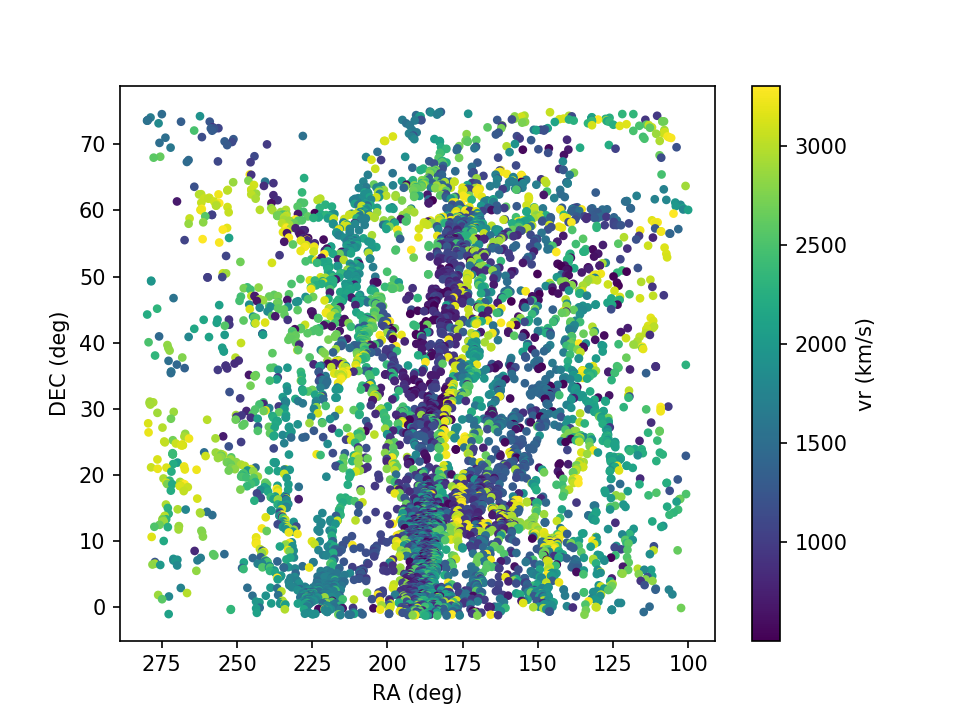

In [62]:
plt.figure()
plt.scatter(maintab['RA'],maintab['DEC'],c=maintab['vr'],s=10)
plt.xlabel('RA (deg)')
plt.ylabel('DEC (deg)')
cb = plt.colorbar()
cb.set_label('vr (km/s)')
ax = plt.gca()
ax.invert_xaxis()

# 3. Combining data from different tables # 


## Positions of Subsamples ##

* In the figure below, we mark the positions of the CO and A100 sources using flags from the main table.  
* We also use a flag from the Halpha table to mark the positions of galaxies with Halpha data.

<IPython.core.display.Javascript object>


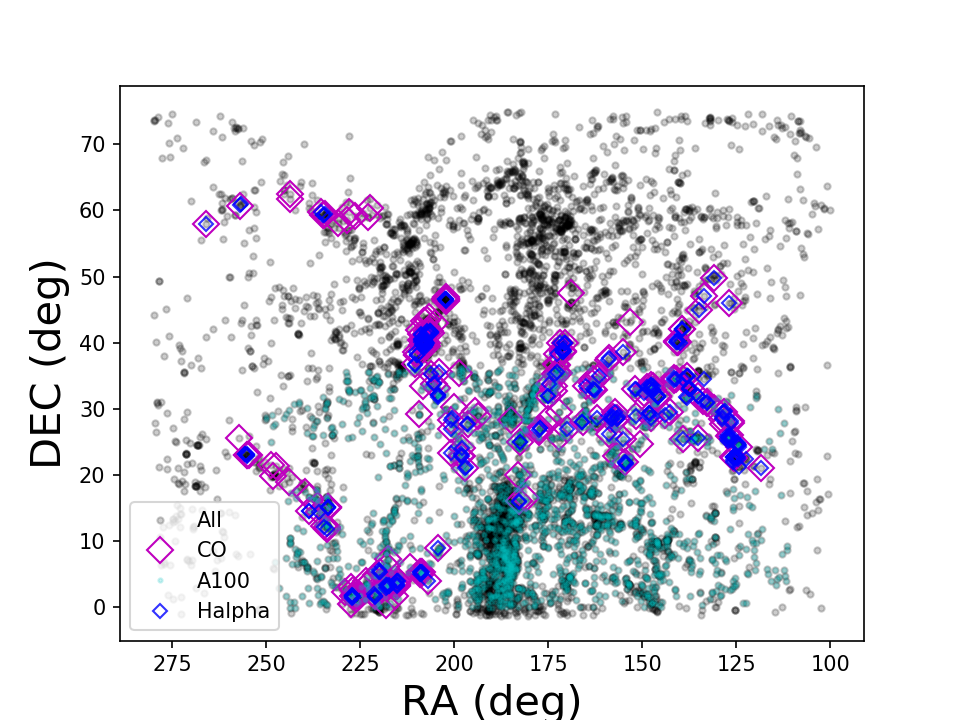

In [63]:
plt.figure()
plt.plot(maintab['RA'],maintab['DEC'],'k.',alpha=.2,label='All')
# plot CO sources
flag =  maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'mD',markersize=9,mfc='None',alpha=1,label='CO')
# HI sources
flag =  maintab['A100flag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'co',markersize=2,alpha=.2,label='A100')
flag =  hatab['haflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bD',markersize=5,mfc='None',alpha=.8,label='Halpha')
plt.legend()#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'CO-sources.png')

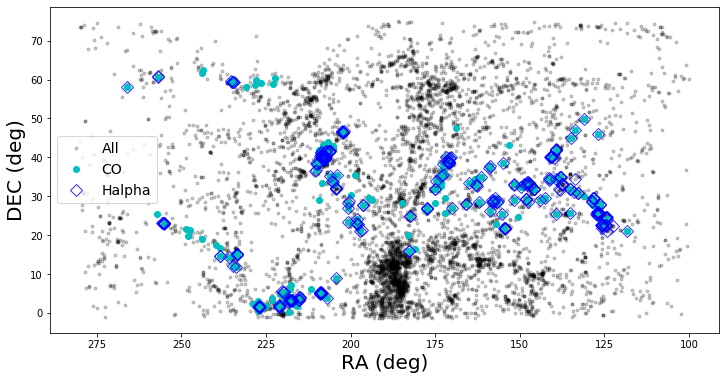

In [15]:
# Halpha only
plt.figure(figsize=(12,6))
plt.plot(maintab['RA'],maintab['DEC'],'k.',alpha=.2,label='All')
# plot CO sources
flag =  maintab['COflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'co',markersize=6,alpha=1,label='CO')
# HI sources
flag =  maintab['A100flag']
#plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'co',markersize=2,alpha=.2,label='A100')
flag =  hatab['haflag']
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bD',markersize=9,mfc='None',alpha=.8,label='Halpha')
plt.legend(fontsize=14)#label='vr (km/s)')
plt.gca().invert_xaxis()
plt.xlabel('RA (deg)',fontsize=20)
plt.ylabel('DEC (deg)',fontsize=20)
plt.savefig(plotdir+'halpha-pointings.png')

# 4. Write a new table #

* combine columns from multiple tables into a new table
* save the file 

In [64]:
newtab = Table([maintab['RA'],maintab['DEC'],maintab['Z0MGSflag'],mgstab['logmass'],mgstab['logsfr']])

In [65]:
newtab

<Table masked=True length=6860>
    RA       DEC     Z0MGSflag   logmass         logsfr    
                               log(solMass) log(solMass/yr)
 float32   float32      bool     float64        float64    
--------- ---------- --------- ------------ ---------------
185.86877   74.95225      True         8.87           -1.42
  182.208  74.904274      True         9.79            0.13
145.94466   74.85958      True        10.35            0.34
185.57309   74.83839      True         9.58           -2.35
182.82774   74.80822      True         9.54           -1.14
173.13419   74.62754      True         9.76           -0.55
121.91241   74.58463      True         8.98           -1.69
 118.2363   74.57653      True         8.91           -1.65
274.94318   74.56839      True        10.32            0.31
      ...        ...       ...          ...             ...
190.73863 -1.2293804      True         9.89           -0.43
215.62787 -1.2293984     False          nan             nan
163.18935    -1.2314     False          nan             nan
 191.5875 -1.2501285     False          nan             nan
186.59453 -1.2542672     False          nan             nan
175.93983 -1.2766024     False          nan             nan
 170.0766    -1.2806     False          nan             nan
 183.4117 -1.2935266     False          nan             nan
187.44257 -1.2951077     False          nan             nan
 180.2962 -1.2961195      True         9.11           -1.34

In [67]:
newtab.write(plotdir+'test_table.fits',overwrite=True)

In [68]:
os.listdir(plotdir)

['test_table.fits',
 'positions-CO.jpg',
 'NGCfilament.png',
 'NGCfilament-GLcomparison.png',
 'CO-sources.png',
 'vf_ngcfilament.png',
 'NGCgroup.png',
 'positions-CO.pdf']

# Making use of readtables.py #

* the program readtables.py will read in all the tables at once.
* you need to provide the path to the tables.
* you could also provide the table prefix, but this shouldn't be necessary until we change version numbers.

In [5]:
homedir = os.getenv("HOME")
os.sys.path.append(homedir+'/github/Virgo/programs/')

In [6]:
import readtables

In [8]:
# initialize an instance of the readtables.readtables class
v = readtables.readfulltables(tabledir='/home/rfinn/research/Virgo/tables-north/v0/',tableprefix='vf_north_v0_')

In [15]:
# to see the list of tables available, look at the methods
help(v)

Help on readfulltables in module readtables object:

class readfulltables(builtins.object)
 |  readfulltables(tabledir='/home/rfinn/research/Virgo/tables-north/v0/', tableprefix='vf_north_v0_')
 |  
 |  Read in the Virgo filament tables.
 |  
 |  Args: 
 |  - tabledir = directory to virgo filament tables
 |  - tableprefix = prefix of the tables, e.g. vf_north_v0
 |  
 |  Returns:
 |  - class instance, with tables appended.
 |  - table names are listed in the methods below.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tabledir='/home/rfinn/research/Virgo/tables-north/v0/', tableprefix='vf_north_v0_')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  read_a100(self)
 |      Read in the a100 tables as self.a100, self.a100sdss,self.a100unwise.
 |  
 |  read_a_table(self, suffix)
 |  
 |  read_co(self)
 |      Read in the CO mastertable table as self.co.
 |  
 |  read_environment(self)
 |      Read in the Gianluca's environment table as self.env.
 |  

In [10]:
# print the a100 table
v.a100

<Table length=6860>
  VFID       RA       DEC     ...  logMH  siglogMH HIcode
 bytes8   float32   float32   ... float64 float64  int64 
-------- --------- ---------- ... ------- -------- ------
VFID0000 185.86877   74.95225 ...     0.0      0.0      0
VFID0001   182.208  74.904274 ...     0.0      0.0      0
VFID0002 145.94466   74.85958 ...     0.0      0.0      0
VFID0003 185.57309   74.83839 ...     0.0      0.0      0
VFID0004 182.82774   74.80822 ...     0.0      0.0      0
VFID0005 173.13419   74.62754 ...     0.0      0.0      0
VFID0006 121.91241   74.58463 ...     0.0      0.0      0
VFID0007  118.2363   74.57653 ...     0.0      0.0      0
VFID0008 274.94318   74.56839 ...     0.0      0.0      0
VFID0009 183.47745    74.5014 ...     0.0      0.0      0
     ...       ...        ... ...     ...      ...    ...
VFID6850 190.73863 -1.2293804 ...     0.0      0.0      0
VFID6851 215.62787 -1.2293984 ...     0.0      0.0      0
VFID6852 163.18935    -1.2314 ...     0.0      0.0      0
VFID6853  191.5875 -1.2501285 ...     0.0      0.0      0
VFID6854 186.59453 -1.2542672 ...     0.0      0.0      0
VFID6855 175.93983 -1.2766024 ...     0.0      0.0      0
VFID6856  170.0766    -1.2806 ...     0.0      0.0      0
VFID6857  183.4117 -1.2935266 ...     0.0      0.0      0
VFID6858 187.44257 -1.2951077 ...     0.0      0.0      0
VFID6859  180.2962 -1.2961195 ...     0.0      0.0      0

In [12]:
# read in Gianluca's CO tables
co = readtables.readCOtables()

In [14]:
help(co)

Help on readCOtables in module readtables object:

class readCOtables(builtins.object)
 |  readCOtables(tabledir='/home/rfinn/research/Virgo/tables-north/v0/', tableprefix='galaxy_sample_prop_')
 |  
 |  Read in the Virgo tables for CO sample.
 |  
 |  Args: 
 |  - tabledir = directory to Gianluca's CO tables
 |  - tableprefix = prefix of the tables, e.g. galaxy_sample_prop
 |  
 |  Returns:
 |  - class instance, with tables appended.
 |  - table names are listed in the methods below.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, tabledir='/home/rfinn/research/Virgo/tables-north/v0/', tableprefix='galaxy_sample_prop_')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  read_CO(self)
 |      Read in CO table as self.co.
 |  
 |  read_HI(self)
 |      Read in HI table as self.HI.
 |  
 |  read_IRAM(self)
 |      Read in IRAM30m table as self.iram.
 |  
 |  read_co_table(self, suffix)
 |  
 |  read_general(self)
 |      Read in general table as self.g

In [13]:
# print CO table for CO sample
co.co

<Table length=134>
objname_HL      Distance        erJ1  ...      SCO_corr         filling_factor  
  bytes9        float64       float64 ...      float64             float64      
---------- ------------------ ------- ... ------------------ -------------------
 PGC022100 30.268591569232242 -1000.0 ...  5.297464369526736  0.6606934480075951
   NGC2577      35.6208309368 -1000.0 ...  8.544916173182122  0.5160963443784982
   NGC2577      35.6208309368 -1000.0 ... 20.393154903563207 0.27729892832873676
   NGC2592      32.5671803783 -1000.0 ... 10.557741562202798 0.43333131172472633
   NGC2592      32.5671803783 -1000.0 ... 26.668140620985007 0.19573918085209183
   NGC2594   34.1327274378687 -1000.0 ...  6.719558195990815  0.6741514647053429
   NGC2594   34.1327274378687 -1000.0 ...  9.585742337437487  0.4037246009508899
  UGC04551  27.28917812562719 -1000.0 ...  8.465402728967131  0.5174000741881308
  UGC04551  27.28917812562719 -1000.0 ... 24.431170900852518  0.3075988470015478
   NGC2679 28.830354574399998 -1000.0 ... 20.554890247593182  0.2670897257961684
       ...                ...     ... ...                ...                 ...
   NGC5854      22.0038620009 -1000.0 ...  13.82360254456116  0.3407216016821267
   NGC5854      22.0038620009 -1000.0 ...   18.1224005879138  0.1862336054005371
   NGC5864      25.9336923696 -1000.0 ... 13.410632160692858  0.3959544886753242
   NGC5864      25.9336923696 -1000.0 ... 24.300489481364284 0.22160047451429665
   NGC5869      27.7222362098 -1000.0 ...   17.4868755416608 0.32252760000282743
   NGC5869      27.7222362098 -1000.0 ...   35.8028330893946 0.13281071886482948
 PGC054452 28.816124823259322 -1000.0 ...  8.606320300810527  0.5838732262296531
 PGC054452 28.816124823259322 -1000.0 ... 18.054009376960675  0.3057492596101261
   NGC5982      36.1163660562 -1000.0 ... 3.3851340082043193    0.33629982000757
   NGC5982      36.1163660562 -1000.0 ... 12.408731446343017 0.18348692009063036

# Leroy #

* compare detection fraction vs stellar mass
* z0mgs flag 


In [24]:
flag = maintab['Z0MGSflag']


In [25]:
mstartab

<Table length=6860>
  VFID      g-r       logM_L_r         logL_r           logMstar     
 bytes8   float32     float32         float64           float64      
-------- ---------- ------------ ----------------- ------------------
VFID0000      -99.0        -99.0             -99.0              -99.0
VFID0001      -99.0        -99.0             -99.0              -99.0
VFID0002      -99.0        -99.0             -99.0              -99.0
VFID0003      -99.0        -99.0             -99.0              -99.0
VFID0004      -99.0        -99.0             -99.0              -99.0
VFID0005      -99.0        -99.0             -99.0              -99.0
VFID0006      -99.0        -99.0             -99.0              -99.0
VFID0007      -99.0        -99.0             -99.0              -99.0
VFID0008      -99.0        -99.0             -99.0              -99.0
VFID0009      -99.0        -99.0             -99.0              -99.0
     ...        ...          ...               ...                ...
VFID6850  0.5749607   0.17473188 9.939528719013454 10.114260599711633
VFID6851 0.36634445 -0.054120123 8.046252482793687  7.992132362799229
VFID6852 0.58802986   0.18906876 6.753273242822362  6.942341995489082
VFID6853 0.40318584 -0.013705134 7.944470623455848  7.930765486760807
VFID6854 0.13341618  -0.30964243 8.312813069497608  8.003170624701117
VFID6855      -99.0        -99.0             -99.0              -99.0
VFID6856  1.3973637     1.076908  7.96631169031422   9.04321969709669
VFID6857 0.12828636  -0.31526986 7.952186818200762  7.636916958953151
VFID6858 0.27552795  -0.15374583 8.494247696556858  8.340501883367446
VFID6859  0.3170452 -0.108201414 9.178199063885264  9.069997653257909

In [26]:
flag = mstartab['logMstar'] > -99

In [29]:
from scipy import stats
import numpy as np

In [45]:
mybins = np.arange(8,11.5,.5)
numerator = stats.binned_statistic(mstartab['logMstar'][flag],values=maintab['Z0MGSflag'][flag],bins=mybins,statistic='sum')
denom = stats.binned_statistic(mstartab['logMstar'][flag],values=np.ones(len(flag))[flag],bins=mybins,statistic='sum')

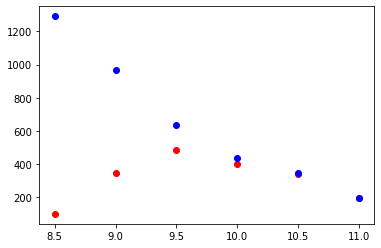

In [46]:
plt.figure()
x = denom[1][1:]
y1 = numerator[0]
y2 = denom[0]
plt.plot(x,y1,'ro')
plt.plot(x,y2,'bo')

In [39]:
y2

array([1291.,  969.,  638.,  436.,  345.,  194.])

In [40]:
y1

array([1291.,  969.,  638.,  436.,  345.,  194.])

In [42]:
sum(flag)/len(flag)

0.7838192419825073

In [24]:
import numpy as np

# Virgo Cluster Galaxies #

/home/rfinn/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:984: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


16


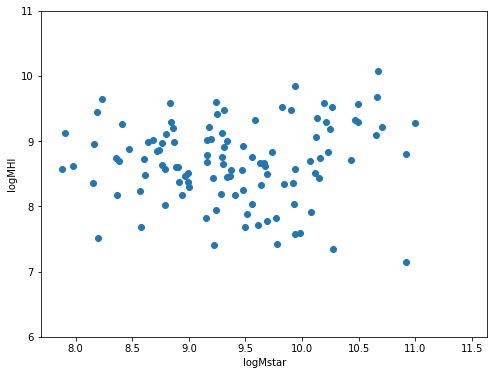

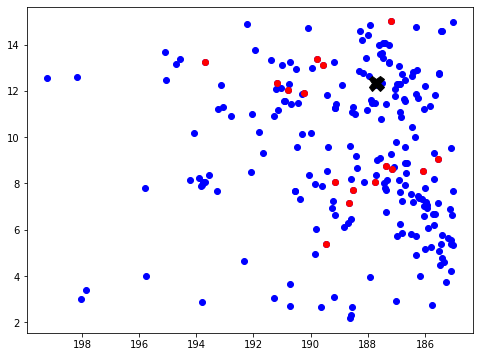

In [41]:
plt.figure(figsize=(8,6))

flag = (maintab['RA']< 200) & (maintab['RA']> 185) & (maintab['DEC']< 15) & (maintab['DEC']< 20)  & (maintab['DEC'] > 2)
mstarflag = mgstab['logmass'] > 2
snr =  (a100tab['siglogMH']) < 1./(3*np.log(10))
flag = flag & snr & mstarflag
plt.scatter(mgstab['logmass'][flag],a100tab['logMH'][flag])
plt.xlabel('logMstar')
plt.ylabel('logMHI')
plt.ylim(6,11)
plt.figure(figsize=(8,6))
plt.plot(maintab['RA'][flag],maintab['DEC'][flag],'bo')
racenter = 187.697083
deccenter = 12.336944
plt.plot(racenter,deccenter,'kX',markersize=15)
flag2 = flag & (a100tab['logMH'] < 8) & (a100tab['logMH'] > 0)
print(sum(flag2))
plt.plot(maintab['RA'][flag2],maintab['DEC'][flag2],'ro')
plt.gca().invert_xaxis()


In [22]:
a100tab.colnames

['VFID',
 'RA',
 'DEC',
 'NEDname',
 'AGC',
 'Name',
 'OrigSrcName',
 'HISrcName',
 'RAdeg_HI',
 'DECdeg_HI',
 'RAdeg_OC',
 'DECdeg_OC',
 'RAdeg_Use',
 'DECdeg_Use',
 'Vhelio',
 'sigV',
 'W50',
 'sigWtot',
 'sigWstat',
 'W20',
 'HIflux',
 'sigflux',
 'SNR',
 'RMS',
 'Dist',
 'sigdist',
 'logMH',
 'siglogMH',
 'HIcode',
 'HIdef',
 'HIdef_flag',
 'HIdef_bos']